In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

In [48]:
df = pd.read_csv('../data/data2.csv')

y = df['severity_class'] - 1
X = df.drop(['severity_class'], axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

N_features = X_train.shape[1]

In [49]:
from sklearn.utils import class_weight

# Assuming y_train contains the class labels (not one-hot encoded)
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

# Convert class weights to a dictionary format
class_weight_dict = dict(enumerate(class_weights))
weights = np.array([class_weights[i] for i in y_train])

In [50]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [51]:
params = {
    'objective': 'multi:softmax',   # For multi-class classification
    'num_class': 9,                 # Number of classes in your dataset
    'learning_rate': 0.1,
    'max_depth': 6,
    'booster':'dart',             # use DART booster
    'subsample':'0.8',              # fraction of samples used for fitting the trees
    'colsample_bytree':'0.8',        # fraction of features used for each tree
    'eval_metric': 'mlogloss',       # Log loss for multi-class classification
}

In [52]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

model = xgb.train(params, dtrain, num_boost_round=100, evals=evallist, early_stopping_rounds=10)


[0]	eval-mlogloss:2.06786	train-mlogloss:2.06291
[1]	eval-mlogloss:1.96840	train-mlogloss:1.95943
[2]	eval-mlogloss:1.88956	train-mlogloss:1.87663
[3]	eval-mlogloss:1.82412	train-mlogloss:1.80747
[4]	eval-mlogloss:1.76915	train-mlogloss:1.74917
[5]	eval-mlogloss:1.72294	train-mlogloss:1.69894
[6]	eval-mlogloss:1.68284	train-mlogloss:1.65520
[7]	eval-mlogloss:1.64821	train-mlogloss:1.61731
[8]	eval-mlogloss:1.61806	train-mlogloss:1.58363
[9]	eval-mlogloss:1.59164	train-mlogloss:1.55371
[10]	eval-mlogloss:1.56805	train-mlogloss:1.52653
[11]	eval-mlogloss:1.54757	train-mlogloss:1.50226
[12]	eval-mlogloss:1.52898	train-mlogloss:1.48071
[13]	eval-mlogloss:1.51275	train-mlogloss:1.46068
[14]	eval-mlogloss:1.49809	train-mlogloss:1.44278
[15]	eval-mlogloss:1.48499	train-mlogloss:1.42602
[16]	eval-mlogloss:1.47338	train-mlogloss:1.41113
[17]	eval-mlogloss:1.46290	train-mlogloss:1.39718
[18]	eval-mlogloss:1.45360	train-mlogloss:1.38468


KeyboardInterrupt: 

In [55]:
### Not sure if it works:...

model = XGBClassifier(
    objective='multi:softmax',
    booster='dart',
    learning_rate=0.1,
    num_class=9,                # specify the number of classes
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',       # Log loss for multi-class classification
)

model.fit(X_train, y_train, sample_weight=weights)


KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(dtest)


Balanced Accuracy: 0.11091726758160812
Weighted F1 Score: 0.41370399471120906
Accuracy: 0.5692399522483088


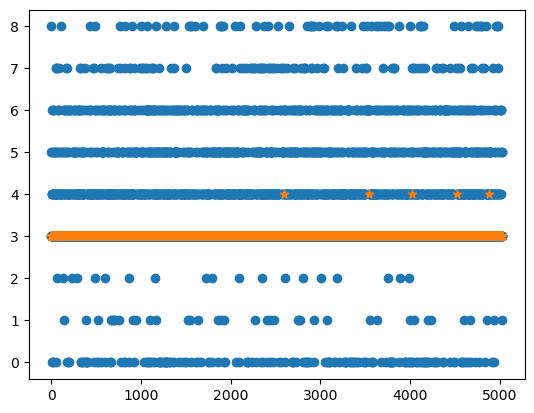

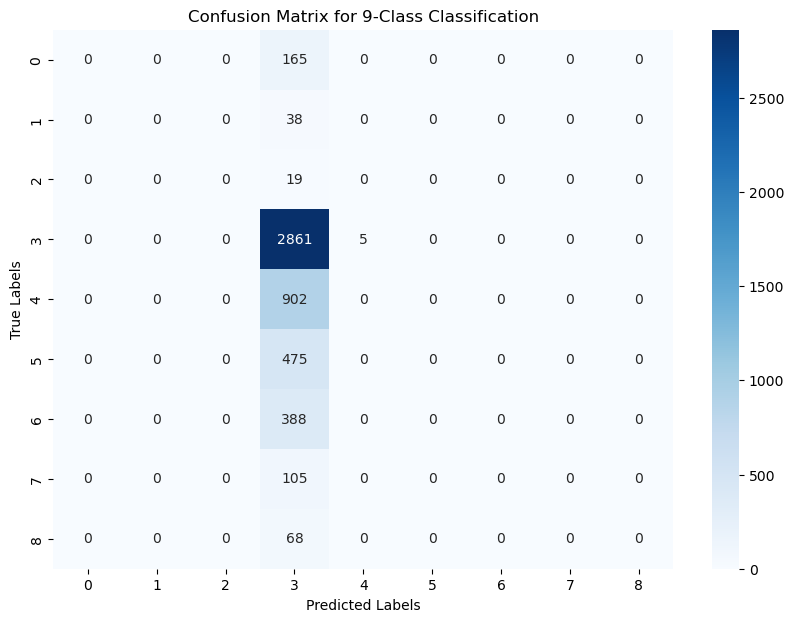

In [ ]:
plt.scatter(np.arange(len(y_test)),y_test)
plt.scatter(np.arange(len(y_pred)),y_pred,marker='*')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score, accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
weighted_f1_score = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f'Balanced Accuracy: {balanced_accuracy}')
print(f'Weighted F1 Score: {weighted_f1_score}')
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
plt.title('Confusion Matrix for 9-Class Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()